
<table>
  <tr>
    <td> <center><img src="images/header1.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Методы обучения без учителя: Методы понижения размерности (Практика)</center></h2>
<h3><center>Ефимов Владислав</center></h3>



In [2]:
%matplotlib inline

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Метод главных компонент

Попробуем получить PCA разными способами

In [4]:
# Load data
df_wine = pd.read_csv('data/winequality-red.csv', sep=';')

# Make classification target feature
df_wine.loc[:, 'quality_cat'] = (df_wine.quality > 5).astype(int)
df_wine = df_wine.drop('quality', axis=1)

# Get descriptive and target features
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

## PCA через sklearn

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=5, random_state=123)

In [7]:
X_center = X - X.mean(axis=0)
X_center.mean(axis=0)

array([ 5.68789682e-16,  3.44384378e-17, -1.77746776e-17, -1.68859437e-16,
        1.61083015e-17, -5.68789682e-16,  1.42197421e-15, -6.54746912e-17,
        4.37701435e-16,  1.14424487e-16,  1.06648065e-16])

In [8]:
X_new = pca.fit_transform(X_center)

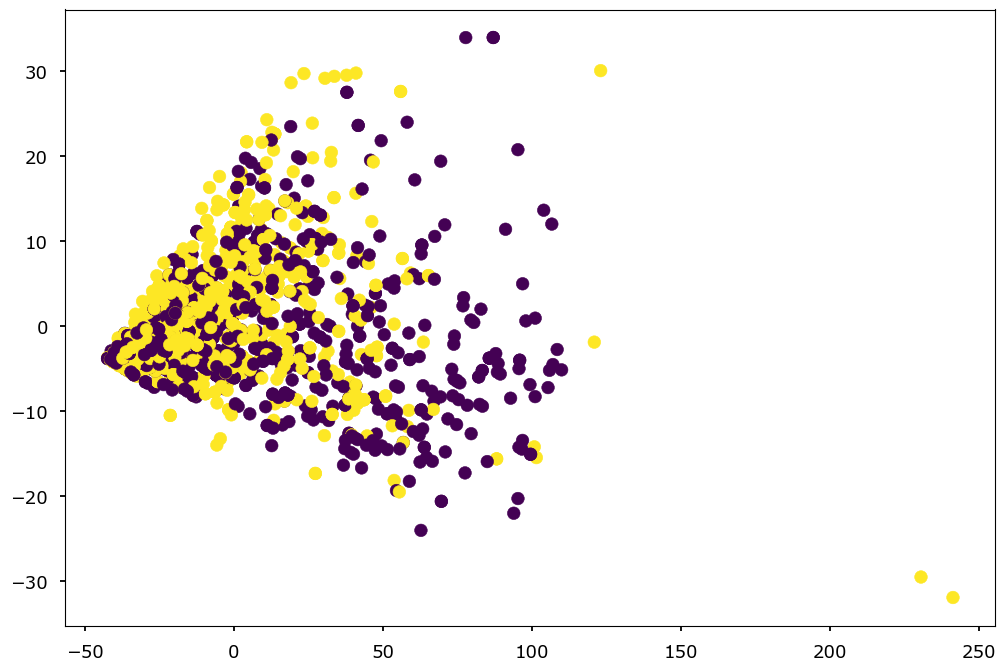

In [9]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

## PCA через ковариационную матрицу

In [10]:
from numpy.linalg import eig

In [11]:
cov = X_center.T @ X_center / (X_center.shape[0] - 1)

In [12]:
eig_val, eig_vec = eig(cov)

In [13]:
eig_val

array([1.13380708e+03, 5.79354108e+01, 3.10130228e+00, 1.81941532e+00,
       1.04634036e+00, 4.13967294e-02, 2.31926578e-02, 1.13464685e-02,
       1.00779841e-02, 1.45499755e-03, 5.61482667e-07])

In [14]:
eig_vec[:, 0]

array([ 6.13247431e-03, -3.84465551e-04, -1.70902595e-04, -8.64894648e-03,
       -6.37307290e-05, -2.18857434e-01, -9.75678369e-01, -3.72498542e-06,
        2.68008619e-04, -2.23381730e-04,  6.35846721e-03])

In [15]:
X_new2 = X_center @ eig_vec

In [16]:
X_new2.shape

(1599, 11)

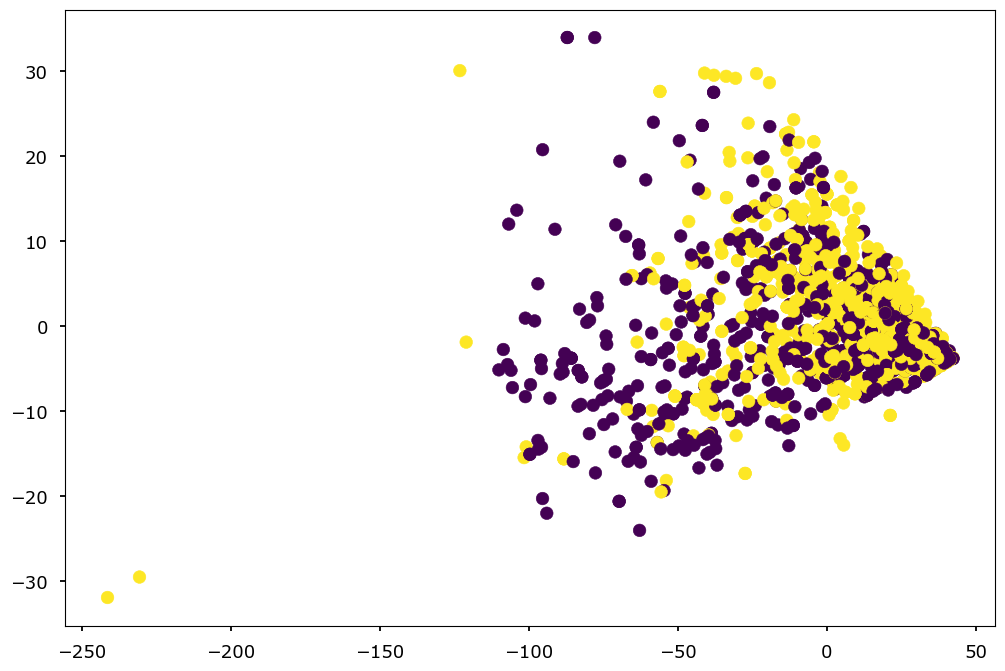

In [17]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)

Видим, что получилось тоже самое, что и в sklearn PCA, но как-будто перевернутое. Это происходит за счет свободы выбора направления у первого вектора в нашей системе, если мы поменяем направление у первого собственного вектора на противоположное, то картинка сойдется.

In [18]:
eig_vec[:, 0] = -eig_vec[:, 0]

In [19]:
X_new2 = X_center @ eig_vec

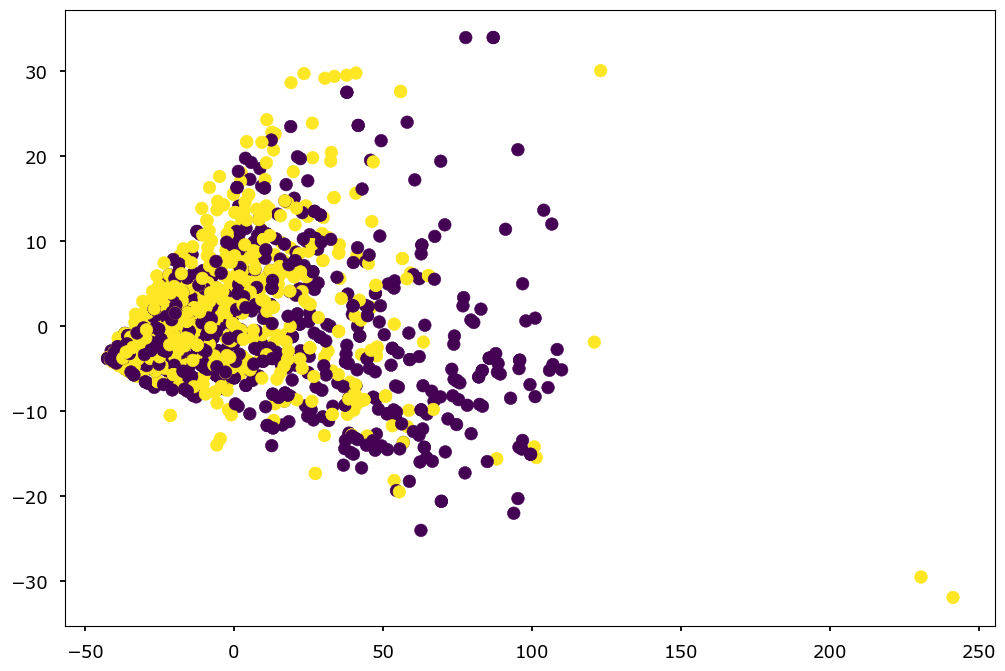

In [20]:
plt.scatter(X_new2[:, 0], X_new2[:, 1], c=y)

Сравним первые две компоненты наших решений, они совпадают.

In [21]:
X_new[:, :2]

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086],
       ...,
       [ -3.43135351,  14.27124349],
       [  1.13287834,  16.31616732],
       [ -3.8743766 ,   3.12634754]])

In [22]:
X_new2[:, :2]

array([[-13.22490501,  -2.02389981],
       [ 22.03772361,   4.40832155],
       [  7.16267333,  -2.50146086],
       ...,
       [ -3.43135351,  14.27124349],
       [  1.13287834,  16.31616732],
       [ -3.8743766 ,   3.12634754]])

## PCA через SVD

In [23]:
u, s, vh = np.linalg.svd(X_center)

In [24]:
v = vh.T

In [25]:
v[:, 0]

array([ 6.13247431e-03, -3.84465551e-04, -1.70902595e-04, -8.64894648e-03,
       -6.37307290e-05, -2.18857434e-01, -9.75678369e-01, -3.72498542e-06,
        2.68008619e-04, -2.23381730e-04,  6.35846721e-03])

In [26]:
eig_vec[:, 0]

array([-6.13247431e-03,  3.84465551e-04,  1.70902595e-04,  8.64894648e-03,
        6.37307290e-05,  2.18857434e-01,  9.75678369e-01,  3.72498542e-06,
       -2.68008619e-04,  2.23381730e-04, -6.35846721e-03])

In [27]:
v[:, 1]

array([ 2.38994985e-02,  2.00966661e-03,  3.03480788e-03, -1.11348551e-02,
        2.36654751e-04, -9.75265982e-01,  2.18916841e-01,  2.49998510e-05,
       -3.27182194e-03, -6.18926046e-04, -1.45642451e-02])

In [28]:
eig_vec[:, 1]

array([-2.38994985e-02, -2.00966661e-03, -3.03480788e-03,  1.11348551e-02,
       -2.36654751e-04,  9.75265982e-01, -2.18916841e-01, -2.49998510e-05,
        3.27182194e-03,  6.18926046e-04,  1.45642451e-02])

Опять же в силу произвольности выбора направлений у нас картинка поворачивается, пофиксим это:

In [29]:
v[:, 0] = -v[:, 0]

In [30]:
X_new3 = X_center @ v

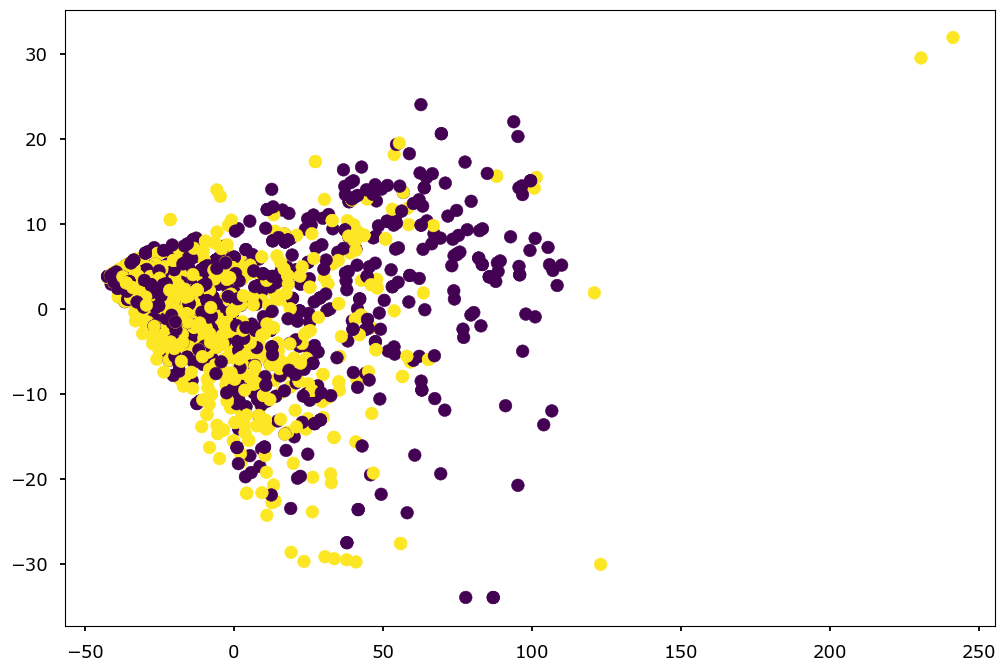

In [31]:
plt.scatter(X_new3[:, 0], X_new3[:, 1], c=y)

# T-SNE

#### Задание
* Выполните "многомерное шкалирование" данных с цифрами с помощью tsne.
* Исследуйте влияние гиперпараметра перплекции

In [1]:
from sklearn.datasets import load_digits

In [2]:
from sklearn.manifold import TSNE

In [3]:
df = load_digits()

In [4]:
X = df["data"]

In [5]:
y = df["target"]

In [6]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [7]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

In [8]:
X_embedded.shape

(1797, 2)

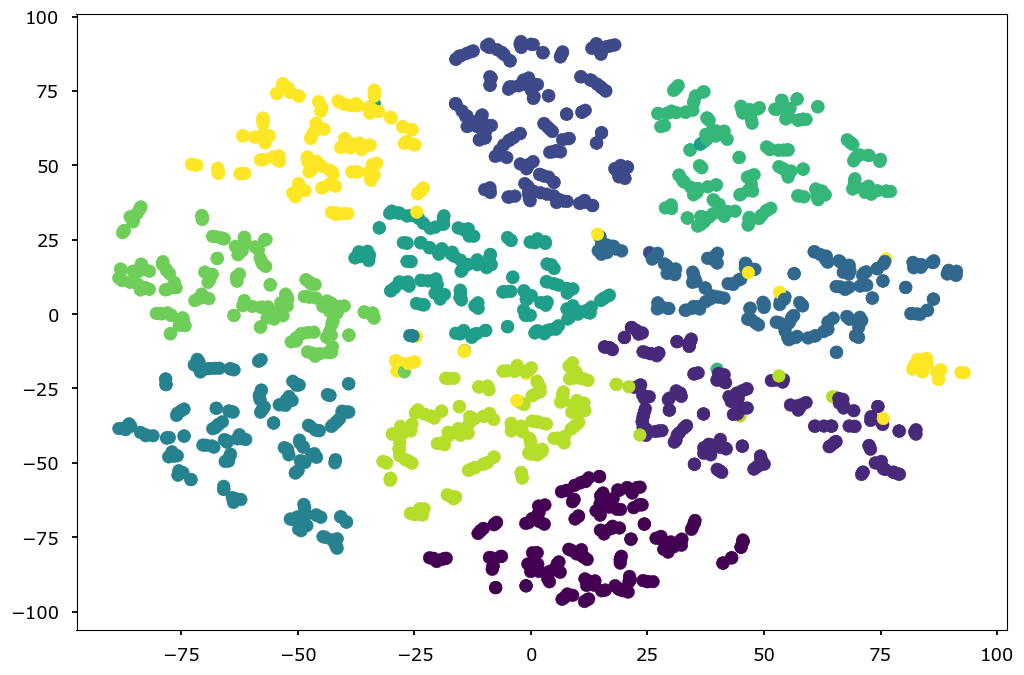

In [13]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y)

# UMAP

#### Задание
* Выполните "многомерное шкалирование" данных с цифрами с помощью umap.
* Исследуйте влияние гиперпараметров min_dist и n_neighbors.
* Сравните время обучения с t-sne.

In [41]:
!pip install umap-learn

Looking in indexes: http://mirror.i.mail.ru/pypi_mirror/simple, https://nexus.adtech.corpcloud.devmail.ru/repository/trg-pypi/simple


In [42]:
import umap
import seaborn as sns

In [42]:
## Your Code Here